In [1]:
import os
import sys
from importlib import reload
from typing import Union, List, Optional, Tuple

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

sys.path.append(os.path.join(os.getcwd(), 'Documents', 'PhD'))
import constants
sys.path.append(constants.MODULE_DIR)

import zecmip_plotting
import utils
logger = utils.get_notebook_logger()

In [2]:
import listXarray as lxr
reload(lxr)
from listXarray import listXarray

In [3]:
VARIABLE_CONTROL_MAP = {
    'tas':{'xlabel': r'Temperature Anomaly ($^\circ C$)', 'cmap':'RdBu_r', 'relative_difference':False},
    'pr': {'xlabel': 'Precipitation Anomaly (mm/day)', 'cmap':'BrBG', 'relative_difference':False}}
LABEl_MAP = VARIABLE_CONTROL_MAP

In [4]:
ROOT_DIR = '/g/data/w40/ab2313/PhD/zecmip/xrlist'

In [5]:
os.listdir(ROOT_DIR)

['tas_zec50_xrlist.csv',
 'tas_zec50_xrlist',
 'pr_esmpi_zec25_xrlist',
 'pr_zec50_xrlist',
 'pr_zec50_xrlist.csv',
 'pr_zec25_xrlist.csv',
 'tas_esmpi_zec25_xrlist',
 'tas_zec25_xrlist',
 'tas_zec25_xrlist.csv',
 '.ipynb_checkpoints',
 'tas_esmpi_zec50_xrlist',
 'pr_esmpi_zec50_xrlist',
 'pr_zec25_xrlist']

In [8]:
# Load temperature data from pi-Control
tas_esmpi_zec25_xrlist = lxr.read_listxarray(os.path.join(ROOT_DIR, 'tas_esmpi_zec25_xrlist'), use_cftime=True)
tas_esmpi_zec50_xrlist = lxr.read_listxarray(os.path.join(ROOT_DIR, 'tas_esmpi_zec50_xrlist'), use_cftime=True)

In [9]:
# The ZEC50 values form CSV
tas_zec50_df = pd.read_csv(os.path.join(ROOT_DIR, 'tas_zec50_xrlist.csv'), index_col='model')
tas_zec25_df = pd.read_csv(os.path.join(ROOT_DIR,'tas_zec25_xrlist.csv'), index_col='model')

EmptyDataError: No columns to parse from file

In [10]:
# The ZEC50 precipitation values form CSV
pr_zec50_df = pd.read_csv(os.path.join(ROOT_DIR,'pr_zec50_xrlist.csv'), index_col='model')
pr_zec25_df = pd.read_csv(os.path.join(ROOT_DIR,'pr_zec25_xrlist.csv'), index_col='model')

In [11]:
# Load precipitation data from pi-Control
pr_esmpi_zec25_xrlist = lxr.read_listxarray(os.path.join(ROOT_DIR, 'pr_esmpi_zec25_xrlist'), use_cftime=True)
pr_esmpi_zec50_xrlist = lxr.read_listxarray(os.path.join(ROOT_DIR, 'pr_esmpi_zec50_xrlist'), use_cftime=True)

In [12]:
# The bins and steps to use for each variabile
bound_tas = 0.32; step_tas=0.01 #tas
bins_tas = np.arange(-bound_tas, bound_tas+step_tas, step_tas)

bound_pr = 0.051; step_pr=0.0008 # pr - mm/day 0.0005
bins_pr = np.arange(-bound_pr, bound_pr+step_pr, step_pr)

In [13]:
len(bins_tas), len(bins_pr)

(65, 129)

In [ ]:
repated_kwargs = dict(add_legend=False)

In [ ]:
fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(len(tas_esmpi_zec25_xrlist), 2, hspace=0, wspace=0)
axes_left = [fig.add_subplot(gs[i, 0]) for i in range(len(tas_esmpi_zec25_xrlist))]
axes_right_all = np.array([fig.add_subplot(gs[i, 1]) for i in range(len(tas_esmpi_zec25_xrlist))])

# There are less models for precipitation. So don't need all, but want the models to algin still
axes_right = np.take(axes_right_all, [0, 1, 2, 4, 5, 6, 8])

axes_right_unused = np.take(axes_right_all, [3, 7])

variable = 'tas'

fig, axes_left = zecmip_plotting.plot_histogram(tas_esmpi_zec25_xrlist.to_dataarray(data_var='tas'), zec_vals=tas_zec25_df, line_label= 'pi-Control ZEC$_{25}}$', 
                           bar_label=r'ZEC$_{25}}$', fig=fig, axes=axes_left, bins=bins_tas, step=step_tas,
                           line_color='cornflowerblue', title_loc='', xlim=0.42, logginglevel='ERROR', **repated_kwargs)

fig, axes_left = zecmip_plotting.plot_histogram(tas_esmpi_zec50_xrlist.to_dataarray(data_var='tas'), zec_vals=tas_zec50_df, title_loc='', line_label='ZEC$_{50}}$',
                           xlabel=LABEl_MAP[variable]['xlabel'],  bar_label= r'pi-Control ZEC$_{50}}$', fig=fig, axes=axes_left,
                           bar_color='purple', line_color='darkmagenta', xlim=0.42, bins=bins_tas, step=step_tas, logginglevel='ERROR', **repated_kwargs)


variable = 'pr'

fig, axes_right = zecmip_plotting.plot_histogram(pr_esmpi_zec25_xrlist.to_dataarray(data_var='pr'), zec_vals=pr_zec25_df,
                                 fig=fig, axes=axes_right, bins=bins_pr, step=step_pr, ylabel_right=True, 
                                 line_label= 'pi-Control ZEC$_{25}}$', bar_label=r'ZEC$_{25}}$', 
                                 line_color='cornflowerblue', xlim=0.05, ylim=0.25,  title_loc='', logginglevel='ERROR', **repated_kwargs)

fig, axes_right = zecmip_plotting.plot_histogram(pr_esmpi_zec50_xrlist.to_dataarray(data_var='pr'), zec_vals=pr_zec50_df,
                                 fig=fig, axes=axes_right, bins=bins_pr, step=step_pr, ylabel_right=True,
                                 title_loc='', line_label='ZEC$_{50}}$', xlabel=LABEl_MAP[variable]['xlabel'], 
                                 bar_label= r'pi-Control ZEC$_{50}}$',bar_color='purple', line_color='darkmagenta',
                                 logginglevel='ERROR', xlim=0.05, ylim=0.25,  **repated_kwargs)

[ax.yaxis.tick_right() for ax in axes_right]

leg = axes_right[0].legend(ncol=4, bbox_to_anchor=[0.9, 1.4], fontsize=12)


axes_left[0].set_title('Global Mean Surface Air Temperature', size=15)
axes_right[0].set_title('Global Mean Precipitation', size=15)


for ax in axes_right_unused:
    ax.set_xticklabels(''); ax.set_yticks([]); ax.set_yticklabels('')

TypeError: plot_histogram() missing 2 required positional arguments: 'bins' and 'step'

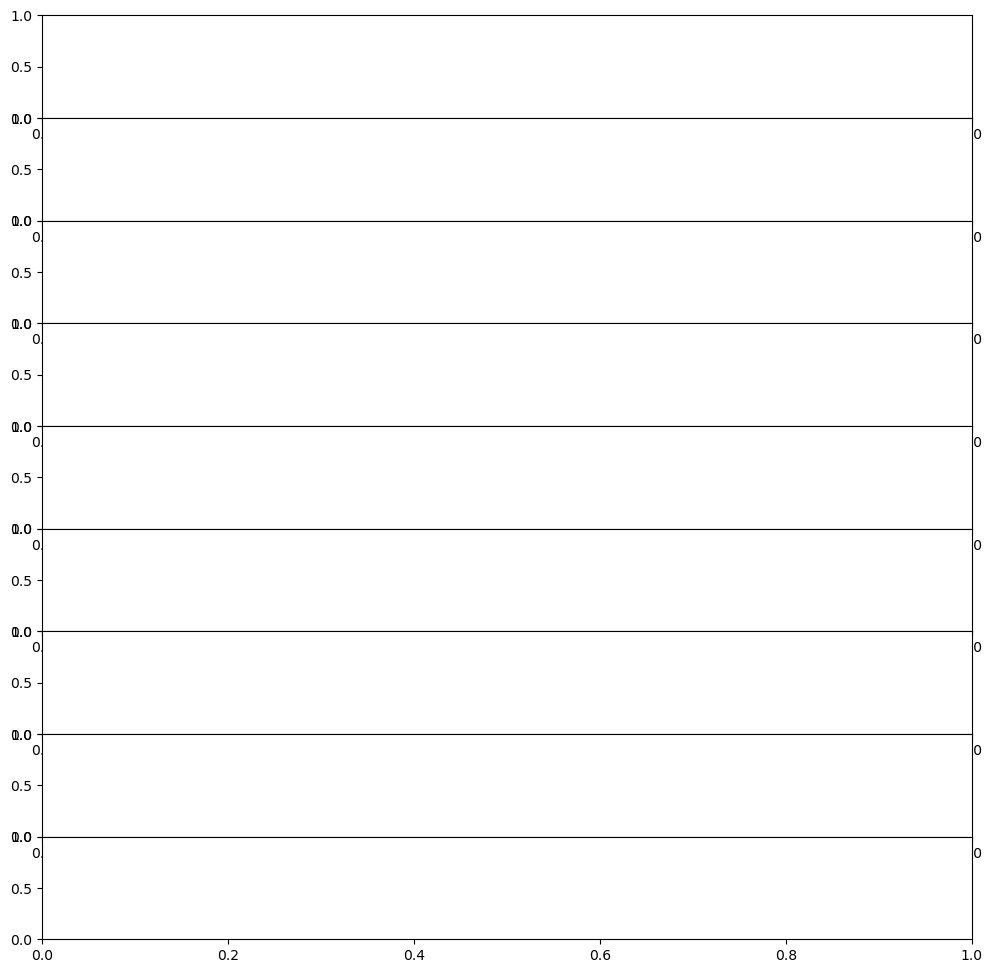

In [28]:
fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(len(tas_esmpi_zec25_xrlist), 1, hspace=0)
axes = [fig.add_subplot(gs[i]) for i in range(len(tas_esmpi_zec25_xrlist))]

fig, axes = plot_histogram(tas_esmpi_zec25_xrlist.to_dataarray(data_var='tas'), zec_vals=tas_zec25_df, line_label= 'pi-Control ZEC$_{25}}$', 
                           bar_label=r'ZEC$_{25}}$', fig=fig, axes=axes, 
                           line_color='cornflowerblue', title_loc='', logginglevel='INFO', **repated_kwargs)
fig, axes = plot_histogram(tas_esmpi_zec50_xrlist.to_dataarray(data_var='tas'), zec_vals=tas_zec50_df, title_loc='', line_label='ZEC$_{50}}$',
                           xlabel=LABEl_MAP[variable]['xlabel'],  bar_label= r'pi-Control ZEC$_{50}}$', fig=fig, axes=axes,
                           bar_color='purple', line_color='darkmagenta', logginglevel='ERROR', **repated_kwargs)

leg = axes[0].legend(ncol=4, bbox_to_anchor=[0.9, 1.4], fontsize=12)